[first data from](https://www.kaggle.com/uciml/glass)

5) оформить всё в виде работоспособной программы

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
file = open("glass.csv", 'r')
reader = csv.reader(file)

raw_data = []
for row in reader:
    raw_data.append(row)
raw_data = raw_data[1:]

file.close()

data = []
for row in raw_data:
    data.append([float(x) for x in row])

x = [row[:-1] for row in data]
y = [row[-1] for row in data]

Визуализация

In [3]:
def plot_PCA(show_data):
    
    pca=PCA(n_components=2)
    reduced_data = pca.fit_transform(show_data)

    fig, ax = plt.subplots()
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1],
               cmap=plt.cm.autumn, edgecolor='b')
    ax.set_title("PCA plot")
    
    plt.show()    

In [4]:
def plot_TSNE(show_data):
    tsne=TSNE()
    reduced_data = tsne.fit_transform(show_data)

    fig, ax = plt.subplots()
    ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
               cmap=plt.cm.autumn, edgecolor='b')
    ax.set_title("TSNE plot")
    
    plt.show()

3) визуализация набора данных с использованием методов снижения размерности

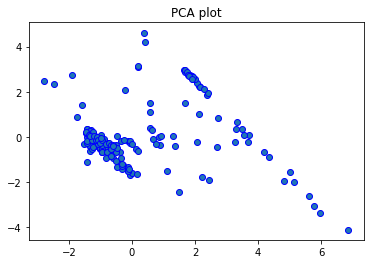

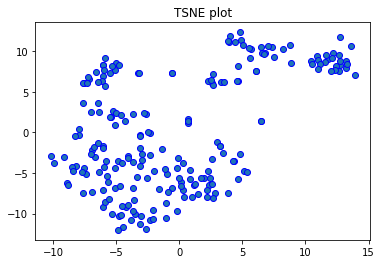

In [5]:
plot_PCA(x)
plot_TSNE(x)

1) построить нейронную сеть и обучить ее

(функция, которая этим занимается)

In [6]:
def train_MLPC(layers, x = x, y = y):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)
        
    # max_iter поставил на такое значение, тк иначе вылетает исключение,
    # что модель не сходится при выставленном количестве итераций
    model = MLPClassifier(layers, activation='tanh', max_iter = 10000)
    model.fit(train_x, train_y)

    y_hat = model.predict(test_x)

    return accuracy_score([[i] for i in test_y], y_hat)

In [7]:
%%time
accuracy = [train_MLPC((64, 64))]
print(accuracy[0])

0.6511627906976745
Wall time: 3.46 s


4) поэкспериментировать с несколькими структурами нейросети

До этого было сделано все с персептроном с внутренними слоями 64 и 64, далее будет несколько других конфигураций

In [8]:
%%time
accuracy.append(train_MLPC((32, 32, 32)))
accuracy.append(train_MLPC((16, 16, 16, 16)))
accuracy.append(train_MLPC((128)))
accuracy.append(train_MLPC((256)))
accuracy.append(train_MLPC((256, 256)))
accuracy.append(train_MLPC((256, 256, 256)))
accuracy.append(train_MLPC((256, 128, 128)))

for i in accuracy:
    print(i)

print("max accuracy : ", max(accuracy))

0.6511627906976745
0.6976744186046512
0.5581395348837209
0.7906976744186046
0.7441860465116279
0.6744186046511628
0.8372093023255814
0.6744186046511628
max accuracy :  0.8372093023255814
Wall time: 26.8 s


Далее проверим те же конфигурации сетей с нормализованными данными

2) чистка и нормализация входных данных

(тут нормализуются данные, 'y' уже не трогается)

In [9]:
x_norm = normalize(x, axis = 0)

train_x_norm, test_x_norm, train_y_norm, test_y_norm = train_test_split(x_norm, y, test_size=0.2)

In [10]:
%%time
accuracy_norm = [
    train_MLPC((64, 64), x = x_norm),
    train_MLPC((32, 32, 32), x = x_norm),
    train_MLPC((16, 16, 16, 16), x = x_norm),
    train_MLPC((128), x = x_norm),
    train_MLPC((256), x = x_norm),
    train_MLPC((256, 256), x = x_norm),
    train_MLPC((256, 256, 256), x = x_norm),
    train_MLPC((256, 128, 128), x = x_norm)
]

for i in accuracy_norm:
    print(i)

print("max accuracy : ", max(accuracy_norm))

0.6744186046511628
0.5813953488372093
0.6744186046511628
0.6046511627906976
0.7674418604651163
0.5813953488372093
0.6744186046511628
0.5813953488372093
max accuracy :  0.7674418604651163
Wall time: 59.7 s


6) обучить сверточную или рекуррентную нейронную сеть

(тут сверточная)

[second data from](https://www.kaggle.com/dronio/SolarEnergy)

In [72]:
from tensorflow import keras
import pandas as pd

In [73]:
def read(path):
    file = open(path)
    reader = csv.reader(file)
    data = []
    for row in reader:
        data.append(row)
    file.close()
    return data

In [74]:
def prepare_data(raw_data):
    data = []
    for row in raw_data:
        if len(row) == 1:
            data.append(int(row[0]))
        else:
            data.append([int(x) for x in row])
    return data

In [75]:
train_x = prepare_data(read("1453_574118_bundle_archive/csvTrainImages 13440x1024.csv"))
test_x = prepare_data(read("1453_574118_bundle_archive/csvTestImages 3360x1024.csv"))

train_y = prepare_data(read("1453_574118_bundle_archive/csvTrainLabel 13440x1.csv"))
test_y = prepare_data(read("1453_574118_bundle_archive/csvTestLabel 3360x1.csv"))

In [86]:
def train_CNN(layers, train_x = train_x, test_x = test_x, train_y = train_y, test_y = test_y):
    # train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)
    train_x = pd.DataFrame.from_records(train_x).values
    test_x = pd.DataFrame.from_records(test_x).values
    train_x = train_x.reshape(train_x.shape[0], train_x.shape[1], -1)
    test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], -1)
    # train_y = np.asarray(train_y)
        
    model = keras.Sequential(name = "CNN")
    for i in layers:
        model.add(
            keras.layers.Conv1D(
                filters = i,
                kernel_size = 3,
                activation = "relu"
                #input_shape = (1024, 1)
            )
        )
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(28, activation = "softmax"))
            
    model.compile(
        keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.),
        keras.losses.MeanSquaredError(reduction='sum'),
        metrics=[keras.metrics.Precision()]
    )
        
    model.fit(train_x, train_y, epochs = 10)
    
    y_hat = model.predict(test_x)
        
    return accuracy_score([[i] for i in test_y], y_hat)

In [91]:
print(train_CNN((64, 64), train_x, train_y))
print(train_CNN((32, 32), train_x, train_y))
print(train_CNN((16, 16, 16), train_x, train_y))

0.5859375
0.48288690476190477
0.34933035714285715
